Dataset Name:-SampleSuperstore

Dataset:-https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

Objectives:-
    1)To Perform Exploratory Data Analysis
    2)Find out business problems


In [2]:
#Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
print("library Imported")

library Imported


In [3]:
#Import Dataset
os.chdir('C:/Users/ANIL/Downloads')
Superstore=pd.read_csv("SampleSuperstore.csv")
Superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing and Cleaning

In [4]:
print(Superstore.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [5]:
# To remove duplicates from each row
Superstore=Superstore.drop_duplicates(keep='first')

From above we say that there is no null value in any column
Hence we process further

## Descriptive statistics

In [6]:
Superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [7]:
# To get unique businesss category
print(f"Business Segments={Superstore['Segment'].unique()}")
print(f"Business Categorys={Superstore['Category'].unique()}")
print(f"Business Sub-Category={Superstore['Sub-Category'].unique()}")

Business Segments=['Consumer' 'Corporate' 'Home Office']
Business Categorys=['Furniture' 'Office Supplies' 'Technology']
Business Sub-Category=['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


# Relation Analysis

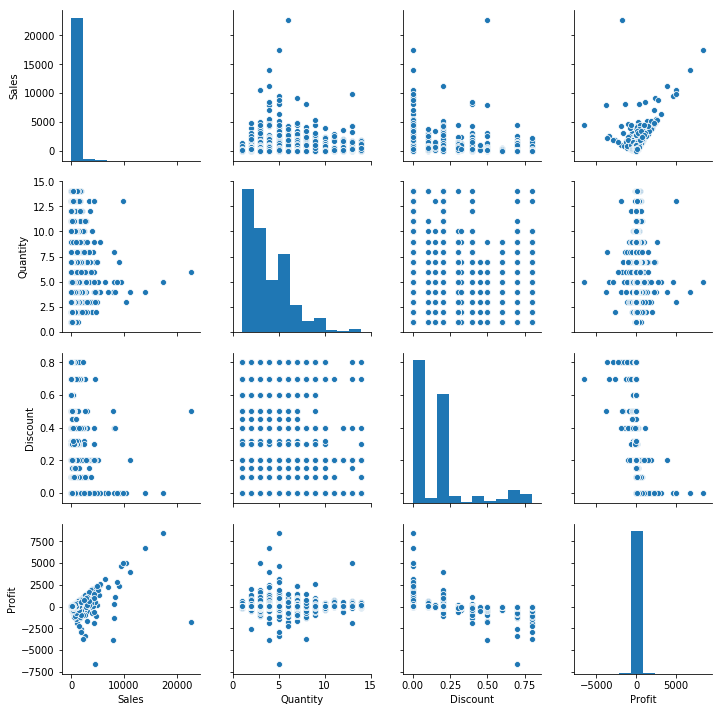

In [8]:
# Pair_plot
financial=Superstore.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

In above we see that there is some relation between sales and profit and also there is some relation between Discount and Profit.
Now To see what exact relation between those entities we plot the heat_map. so we get more clearity

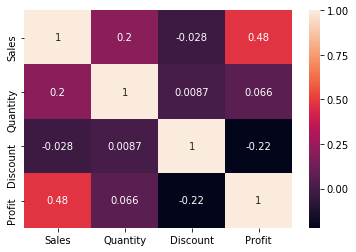

In [9]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

From Above map we say that,
1)sales and profits are positively correlated 
2)Discount and Profits are Negatively correlated 

Hence we consider these cases and proceed further

# Case-1 When Discount is 0

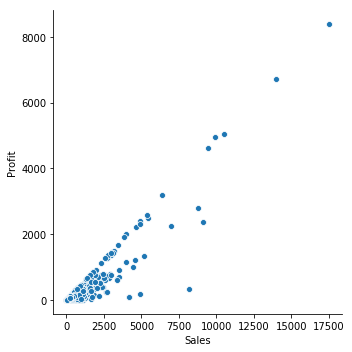

In [10]:
data=Superstore[Superstore['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

Hence we say that there positive relation between Profit and sales.when Discount is 0 
Now we plot heat_map to get correlaton


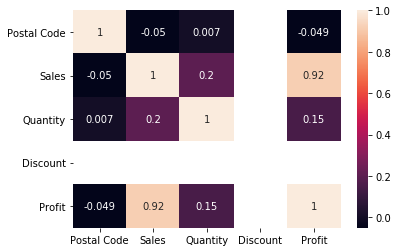

In [11]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Hence, we see that There is strong correlation between sales and Profit i.e 0.92

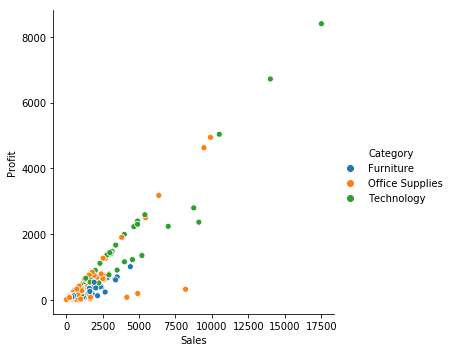

In [12]:
#Rel_plot with respect category
sns.relplot(x='Sales',y='Profit',hue='Category',data=data)

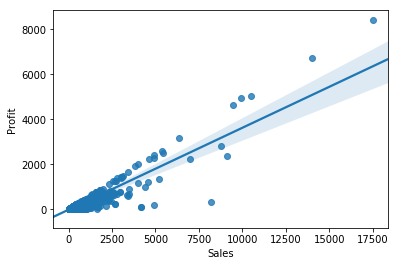

In [13]:
# Regression Plot 
sns.regplot(data['Sales'],data['Profit'])

There is positive trend between Profit and sales

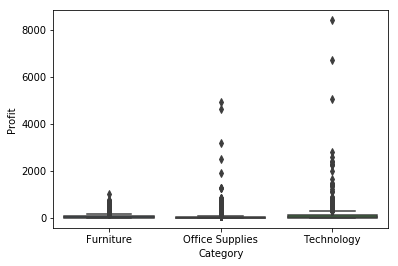

In [14]:
sns.boxplot(x='Category',y='Profit',data=data)

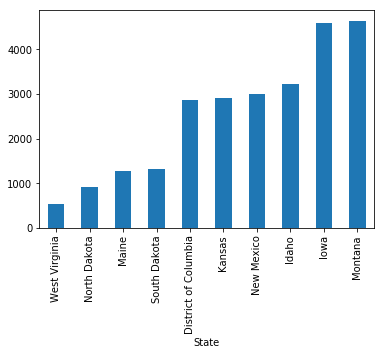

In [15]:
data1=data.groupby('State').apply(lambda data,x:sum(data[x]),'Sales')
data1=data1.sort_values(ascending=True)[:10]
data1.plot(kind='bar')

In above plot we see that lowest Sales in 'West Virginia' State 

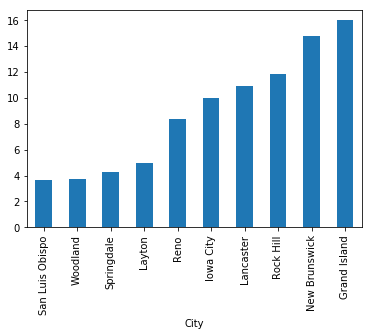

In [16]:
data1=data.groupby('City').apply(lambda data,x:sum(data[x]),'Sales')
data1=data1.sort_values(ascending=True)[:10]
data1.plot(kind='bar')

From above bar plot we say that Sales in 'San Luis Obispo' and 'Woodland' City are vary low

# Case-2 When Discount is Not 0

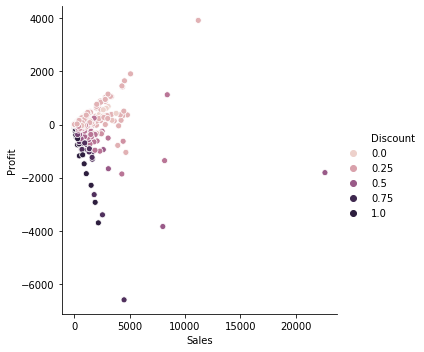

In [95]:
data1=Superstore[Superstore['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data1)

In above graph we see that as percentages of Discount increses the sales is also goes increses but profit goes decreases

Now we check how it can be effects on different sectors of businesses

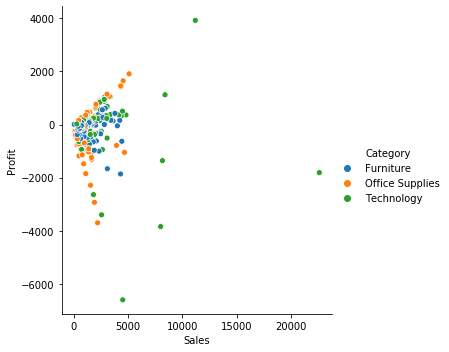

In [97]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=data1)

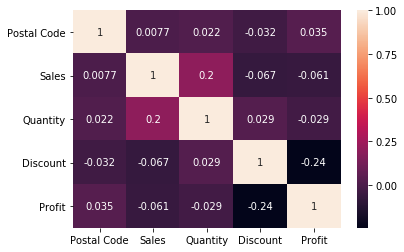

In [98]:
#realtion analysis
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

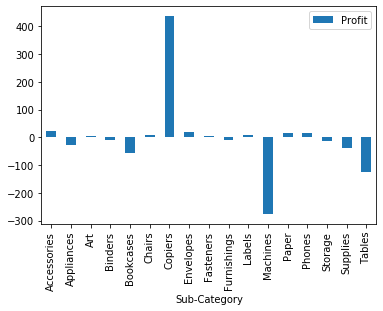

In [126]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

Here we see that copiers had highest profit and Machines had highest loss

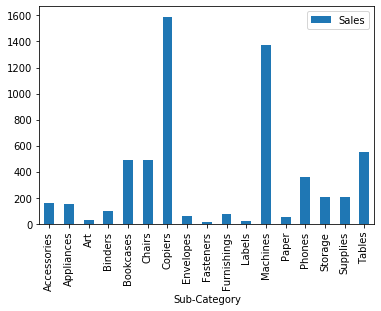

In [127]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

Here we see that copiers had highest sale and Machines had second highest sales

In above two graph we see that 'Machines' had second highest sale but due to large discount it is in loss
and in second graph we see that sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate  on these sub-category businesses

# Distribution of data

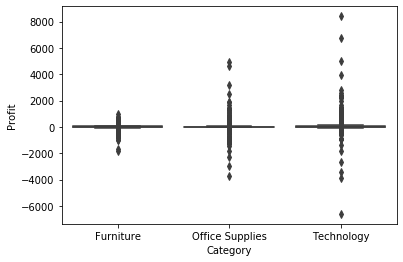

In [102]:
# box plot
sns.boxplot(x='Category',y='Profit',data=Superstore)

we see that variation in Technology sector is more as compared to other two sector

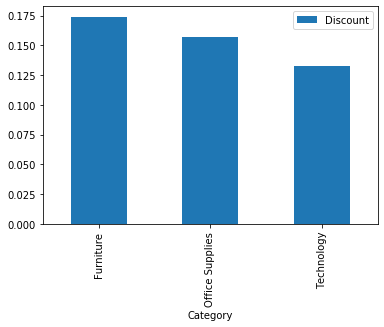

In [122]:
pivot=pd.pivot_table(Superstore,index='Category',values='Discount')
pivot.plot(kind='bar')

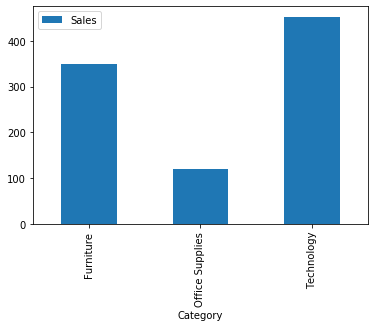

In [123]:
pivot=pd.pivot_table(Superstore,index='Category',values='Sales')
pivot.plot(kind='bar')

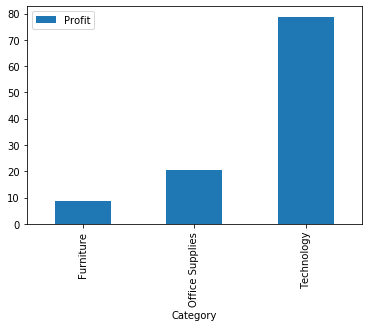

In [125]:
pivot=pd.pivot_table(Superstore,index='Category',values='Profit')
pivot.plot(kind='bar')

From above three plot we say that
1)More Discount is given in Furniture category and less Discount is given in Technology category businesses
2)Sales of Technology category businesses are more as compared to Furniture category
3)profit of Technology category businesses are more as compared to Furniture category


# conclusion

From All thsese analysis we Finally conclude that,
1)If we give more Discount on products our sales goes increses but Profit get down
2)In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount
3)Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two
4)Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses
5)We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City.
5)Hence To get good profit in any business you have to focus on increasing sales but not giving more discount